In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
data=pd.read_csv('YourCabs.csv')

In [3]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [4]:
del data['id']

In [5]:
del data['user_id']
del data['vehicle_model_id']
del data['package_id']
del data['travel_type_id']
del data['to_area_id']
del data['from_lat']
del data['from_long']
del data['to_lat']
del data['to_long']

In [6]:
data.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,83.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,0
1,1010.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,0
2,1301.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,0
3,768.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,0
4,1365.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         43343 non-null  float64
 1   from_city_id         16345 non-null  float64
 2   to_city_id           1588 non-null   float64
 3   from_date            43431 non-null  object 
 4   online_booking       43431 non-null  int64  
 5   mobile_site_booking  43431 non-null  int64  
 6   booking_created      43431 non-null  object 
 7   Car_Cancellation     43431 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.7+ MB


In [8]:
data.describe()

,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation
count,43343.000000,16345.000000,1588.000000,43431.000000,43431.000000,43431.000000
mean,714.544494,14.915081,68.537783,0.351592,0.043241,0.072114
std,419.883553,1.165306,49.880732,0.477473,0.203402,0.258680
min,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000
25%,393.000000,15.000000,32.000000,0.000000,0.000000,0.000000
50%,590.000000,15.000000,49.000000,0.000000,0.000000,0.000000
75%,1089.000000,15.000000,108.000000,1.000000,0.000000,0.000000
max,1403.000000,31.000000,203.000000,1.000000,1.000000,1.000000


In [9]:
data.shape

(43431, 8)

In [10]:
data.isnull().sum()

from_area_id              88
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
Car_Cancellation           0
dtype: int64

In [11]:
round(data.isnull().sum()*100/data.shape[0],2)

from_area_id            0.20
from_city_id           62.37
to_city_id             96.34
from_date               0.00
online_booking          0.00
mobile_site_booking     0.00
booking_created         0.00
Car_Cancellation        0.00
dtype: float64

In [12]:
data.from_city_id= data.from_city_id.fillna(data.from_city_id.mode())          

In [13]:
data.from_area_id= data.from_area_id.fillna(data.from_area_id.mode())          

In [14]:
data.to_city_id= data.to_city_id.fillna(data.to_city_id.mean())          

In [15]:
data.isnull().sum()

from_area_id              88
from_city_id           27085
to_city_id                 0
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
Car_Cancellation           0
dtype: int64

In [16]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [17]:
data['from_date']=pd.to_datetime(data['from_date'],format = '%dT-%m-%Y %H:%M', errors = 'coerce')
data['booking_created']=pd.to_datetime(data['booking_created'],format = '%dT-%m-%Y %H:%M',errors = 'coerce')
data.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,83.0,15.0,68.537783,NaT,0,0,NaT,0
1,1010.0,NaN,68.537783,NaT,0,0,NaT,0
2,1301.0,NaN,68.537783,NaT,0,0,NaT,0
3,768.0,NaN,68.537783,NaT,0,0,NaT,0
4,1365.0,NaN,68.537783,NaT,0,0,NaT,0


<Axes: >

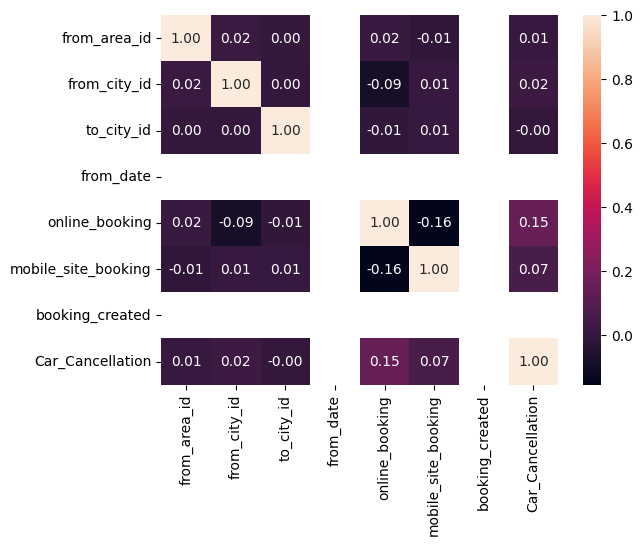

In [18]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')

In [19]:
data.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,83.0,15.0,68.537783,NaT,0,0,NaT,0
1,1010.0,NaN,68.537783,NaT,0,0,NaT,0
2,1301.0,NaN,68.537783,NaT,0,0,NaT,0
3,768.0,NaN,68.537783,NaT,0,0,NaT,0
4,1365.0,NaN,68.537783,NaT,0,0,NaT,0


In [20]:
def preprocessor(data):
    df=data.copy()
    le=preprocessing.LabelEncoder()
    df['from_date']=le.fit_transform(df['from_date'])
    df['booking_created']=le.fit_transform(df['booking_created'])
    return df

In [21]:
encoded_df = preprocessor(data)
encoded_df.head(2)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,83.0,15.0,68.537783,0,0,0,0,0
1,1010.0,NaN,68.537783,0,0,0,0,0


In [22]:
x = encoded_df.drop('Car_Cancellation',axis=1).values
y = encoded_df['Car_Cancellation'].values

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_train = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

Training Score 0.927958784250518
Testing Score 0.9275929549902152


In [25]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(x_train,y_train)

model_dt_4_score_train = model_dt_4.score(x_train,y_train)

model_dt_4_score_test = model_dt_4.score(x_test,y_test)

print('Training Score',model_dt_4_score_train)

print('Testing Score',model_dt_4_score_test)

Training Score 0.9279875661984803
Testing Score 0.9272476113733165


In [26]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(x_train,y_train)

model_dt_6_score_train = model_dt_6.score(x_train,y_train)

model_dt_6_score_test = model_dt_6.score(x_test,y_test)

print('Training Score',model_dt_6_score_train)

print('Testing Score',model_dt_6_score_test)

Training Score 0.9283905134699516
Testing Score 0.927477840451249


In [27]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(x_train,y_train)

model_dt_8_score_train = model_dt_8.score(x_train,y_train)

model_dt_8_score_test = model_dt_8.score(x_test,y_test)

print('Training Score',model_dt_8_score_train)

print('Testing Score',model_dt_8_score_test)

Training Score 0.9286495510016118
Testing Score 0.9272476113733165


In [28]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(x_train,y_train)

model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.927958784250518
0.9275929549902152


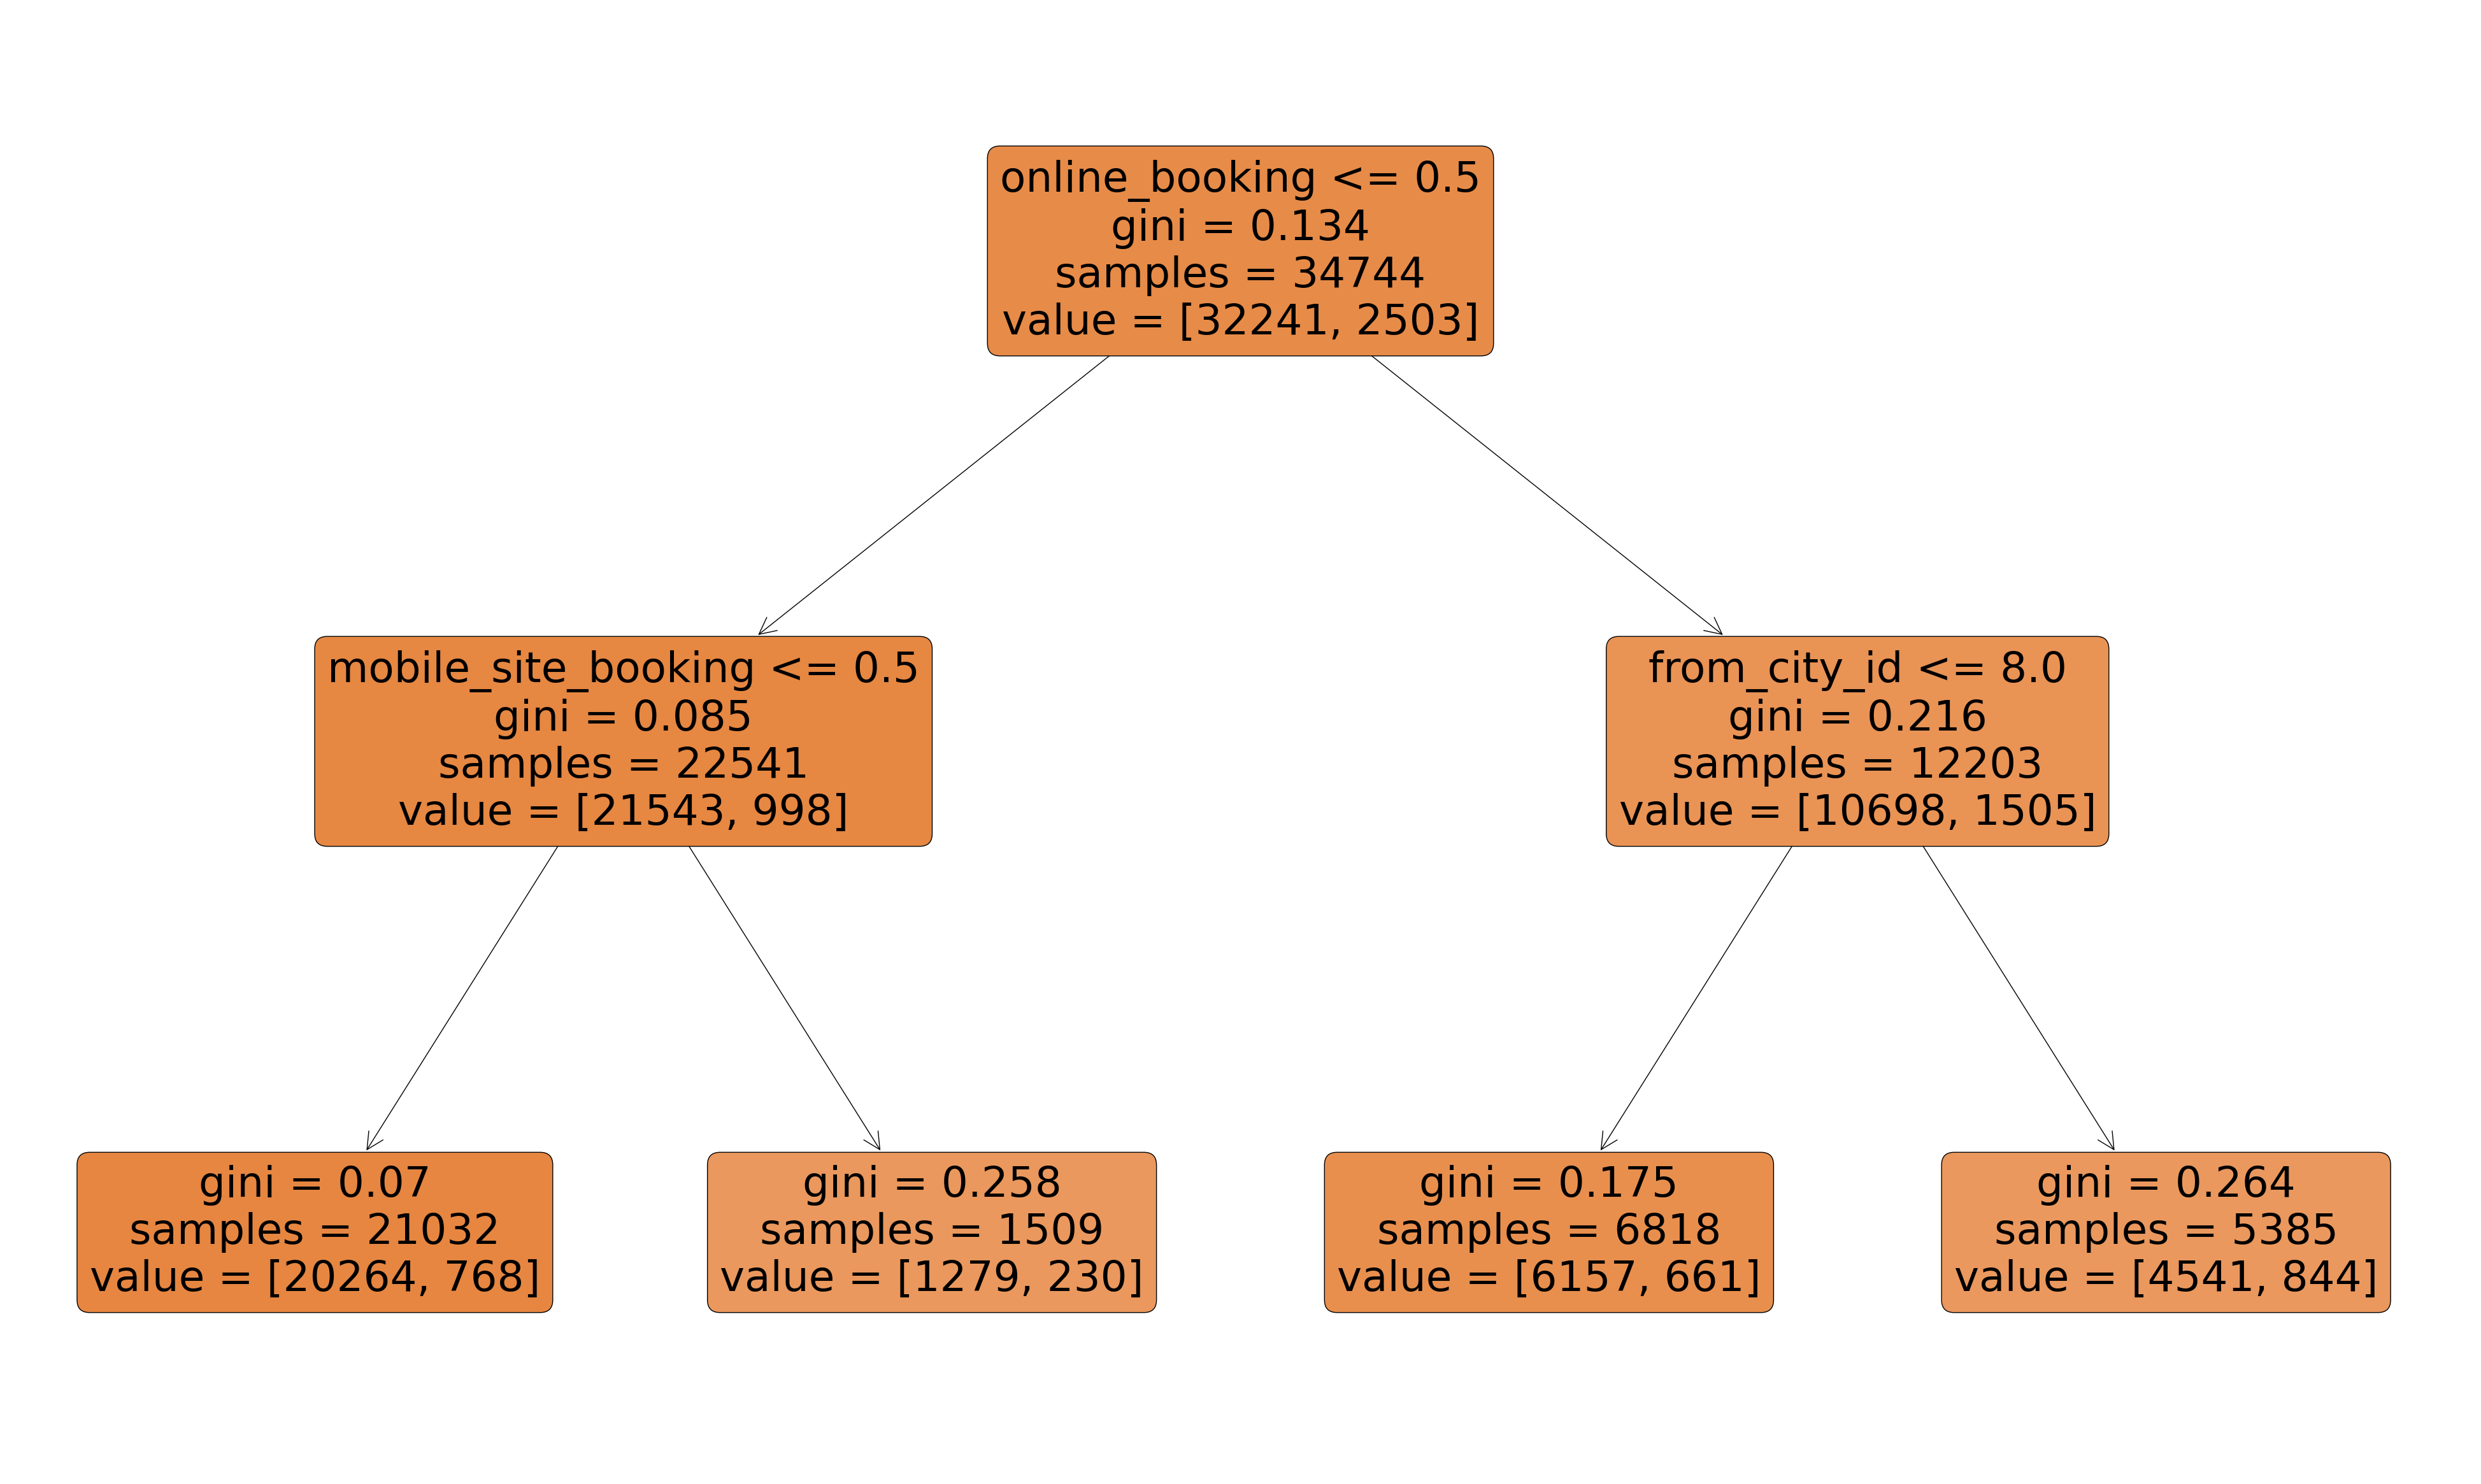

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,30)) 
plot_tree(model_dt_2, feature_names=data.columns,filled=True, rounded=True)
plt.show()

In [30]:
y_pred_dt = model_dt.predict_proba(x_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

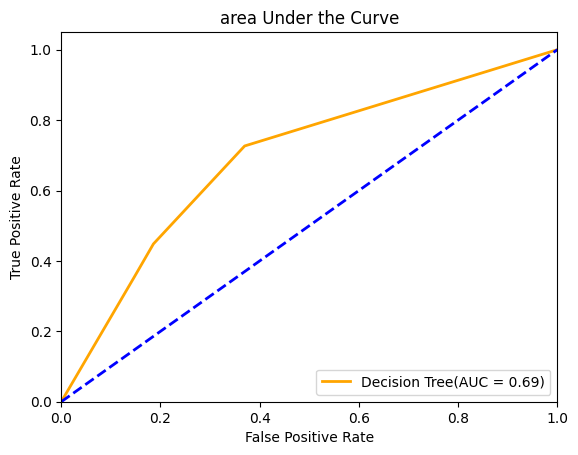

In [31]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [32]:
predictions = model_dt.predict(x_test)
print(confusion_matrix(y_test,predictions))

[[8058    0]
 [ 629    0]]


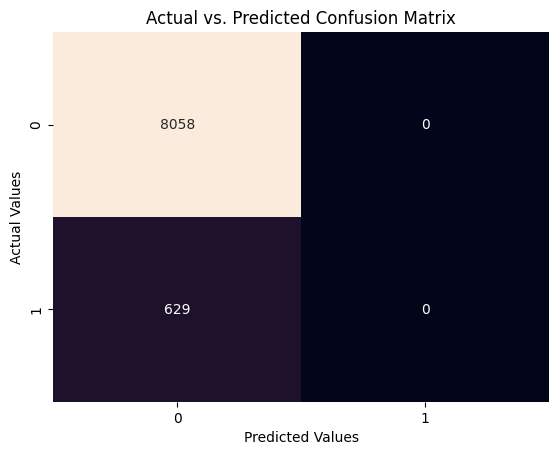

In [33]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [34]:
accuracy_score(y_test,predictions)

0.9275929549902152

second-point to point

In [35]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [36]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [37]:
data1=pd.read_csv('YourCabs.csv')

In [38]:
data1.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [39]:
data1.drop(['id','user_id','vehicle_model_id','package_id','travel_type_id','travel_type_id','to_city_id'],inplace=True,axis=1)

In [40]:
data1.head()

,from_area_id,to_area_id,from_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,83.0,448.0,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,1010.0,540.0,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,1301.0,1034.0,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,768.0,398.0,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,1365.0,849.0,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [41]:
data1.isnull().sum()

from_area_id              88
to_area_id              9138
from_city_id           27086
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [42]:
data1.shape

(43431, 12)

In [43]:
round(data1.isnull().sum()*100/data1.shape[0],2)

from_area_id            0.20
to_area_id             21.04
from_city_id           62.37
from_date               0.00
online_booking          0.00
mobile_site_booking     0.00
booking_created         0.00
from_lat                0.21
from_long               0.21
to_lat                 21.04
to_long                21.04
Car_Cancellation        0.00
dtype: float64

In [44]:
data1.drop(['to_area_id','from_city_id','to_long','to_lat'],inplace=True,axis=1)          

In [45]:
round(data1.isnull().sum()*100/data1.shape[0],2)

from_area_id           0.20
from_date              0.00
online_booking         0.00
mobile_site_booking    0.00
booking_created        0.00
from_lat               0.21
from_long              0.21
Car_Cancellation       0.00
dtype: float64

In [46]:
data1.from_area_id=data1.from_area_id.fillna(data1.from_area_id.mean())
data1.from_lat=data1.from_lat.fillna(data1.from_lat.mean())
data1.from_long=data1.from_long.fillna(data1.from_long.mean())

In [47]:
round(data1.isnull().sum()*100/data1.shape[0],2)

from_area_id           0.0
from_date              0.0
online_booking         0.0
mobile_site_booking    0.0
booking_created        0.0
from_lat               0.0
from_long              0.0
Car_Cancellation       0.0
dtype: float64

In [48]:
data1['from_date']=pd.to_datetime(data['from_date'],format = '%dT-%m-%Y %H:%M', errors = 'coerce')
data1['booking_created']=pd.to_datetime(data['booking_created'],format = '%dT-%m-%Y %H:%M',errors = 'coerce')
data1.head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
0,83.0,NaT,0,0,NaT,12.924150,77.672290,0
1,1010.0,NaT,0,0,NaT,12.966910,77.749350,0
2,1301.0,NaT,0,0,NaT,12.937222,77.626915,0
3,768.0,NaT,0,0,NaT,12.989990,77.553320,0
4,1365.0,NaT,0,0,NaT,12.845653,77.677925,0


<Axes: >

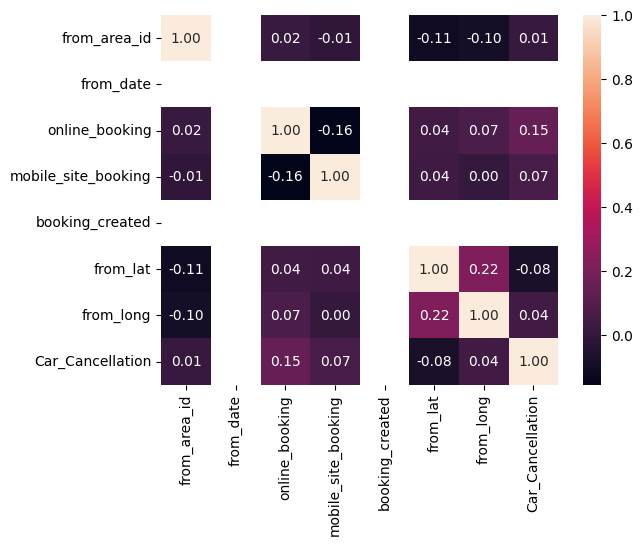

In [49]:
sns.heatmap(data1.corr(),annot=True,fmt='.2f')

In [50]:
def preprocessor(data):
    df=data.copy()
    le=preprocessing.LabelEncoder()
    df['from_date']=le.fit_transform(df['from_date'])
    df['booking_created']=le.fit_transform(df['booking_created'])
    return df

In [51]:
encoded_df1=preprocessor(data1)
encoded_df1.head(2)

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
0,83.0,0,0,0,0,12.92415,77.67229,0
1,1010.0,0,0,0,0,12.96691,77.74935,0


In [52]:
pip install notebook

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
x=encoded_df1.drop('Car_Cancellation',axis=1)
y=encoded_df1['Car_Cancellation'].values

In [54]:
#x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [55]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_train = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

Training Score 0.927958784250518
Testing Score 0.9275929549902152


In [56]:
model_dt_2 = DecisionTreeClassifier(random_state=2,max_depth=8)

model_dt_2.fit(x_train,y_train)

model_dt_2_score_train = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

Training Score 0.9286495510016118
Testing Score 0.9272476113733165


In [57]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')
model_dt_2.fit(x_train,y_train)

model_dt_2_score_train = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

Training Score 0.9286495510016118
Testing Score 0.9272476113733165


In [58]:
model_dt = DecisionTreeClassifier(max_depth=4,criterion='entropy')

model_dt.fit(x_train,y_train)

model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.9279875661984803
0.9272476113733165


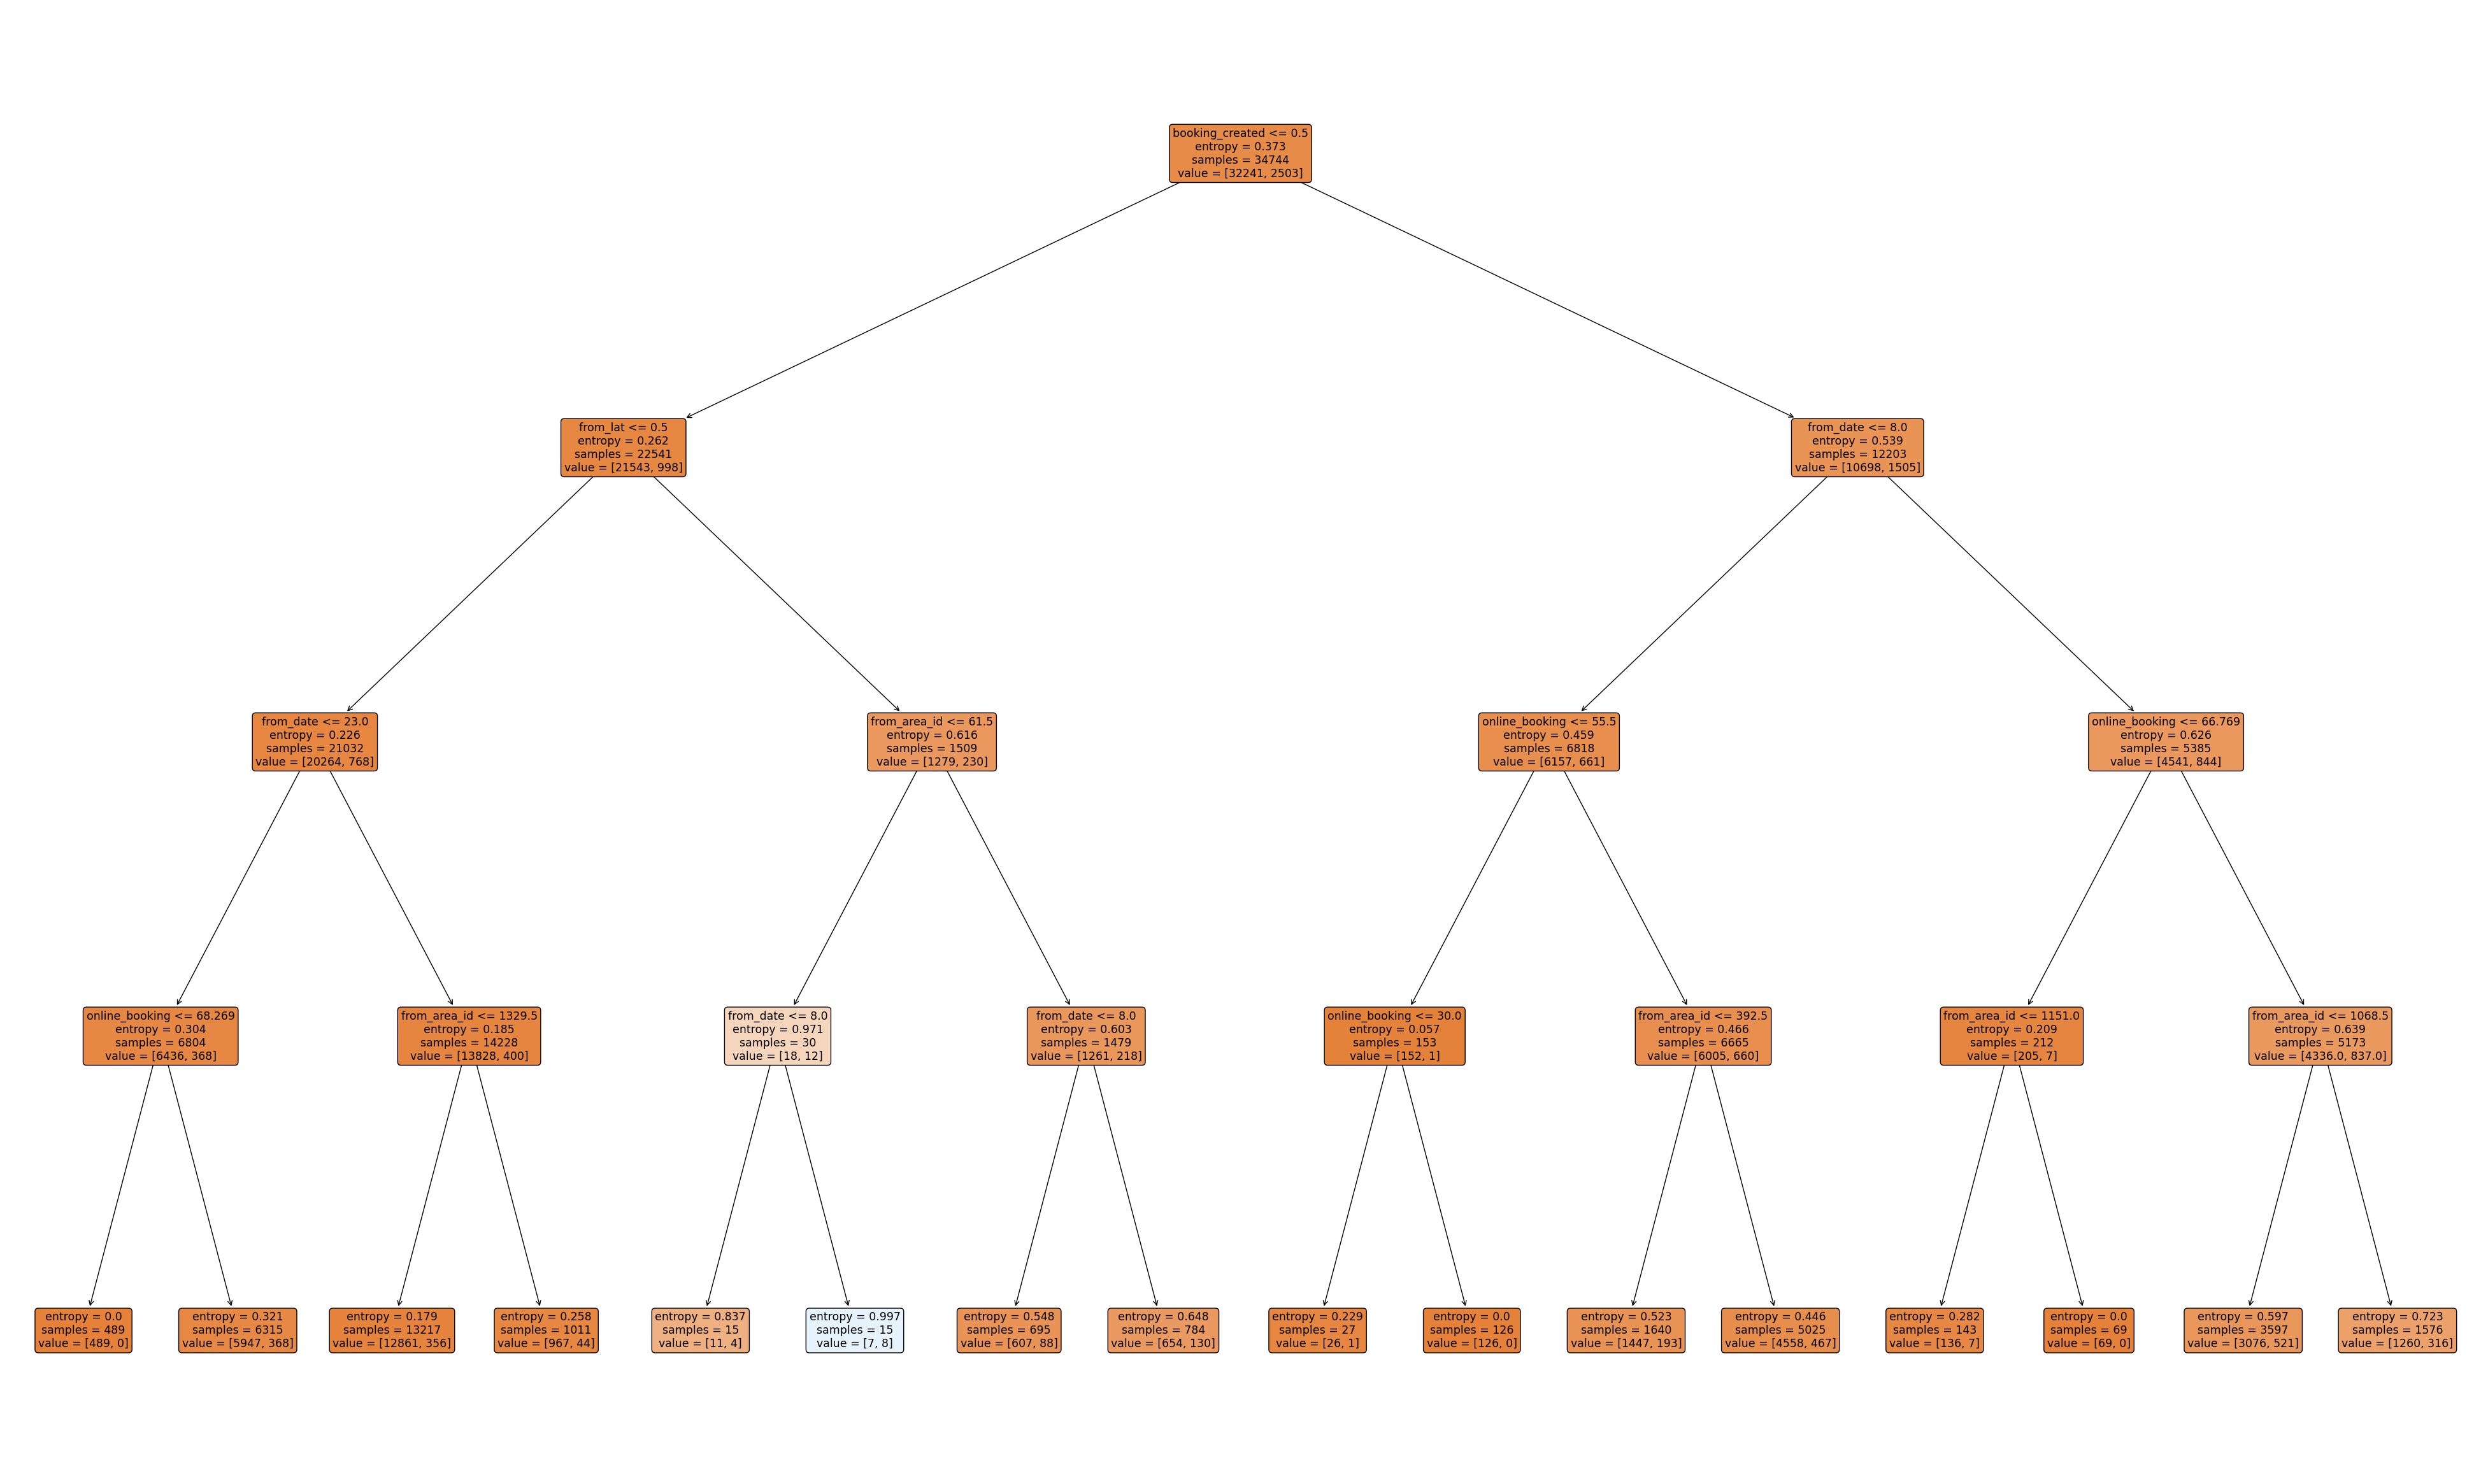

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,30)) 
plot_tree(model_dt, feature_names=data1.columns,filled=True, rounded=True)
plt.show()

In [60]:
y_pred_dt = model_dt.predict_proba(x_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

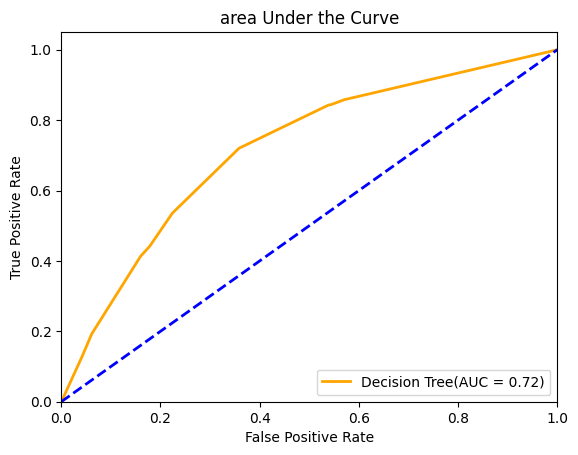

In [61]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [62]:
predictions = model_dt.predict(x_test)
print(confusion_matrix(y_test,predictions))

[[8055    3]
 [ 629    0]]


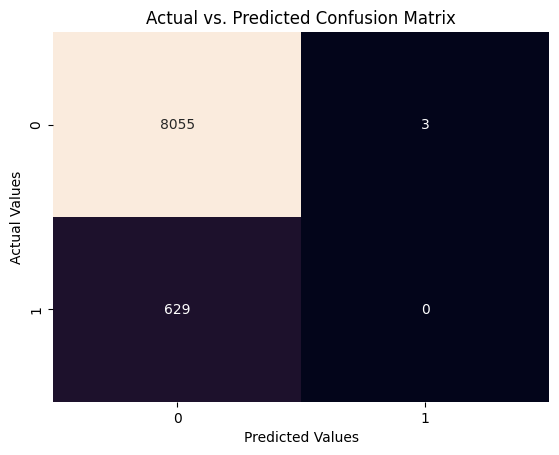

In [63]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [64]:
accuracy_score(y_test,predictions)

0.9272476113733165

third hourly travel

In [65]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [66]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [67]:
data=pd.read_csv('YourCabs.csv')
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [68]:
data.drop(['id','user_id','vehicle_model_id','from_lat','from_long','to_lat','to_long'],inplace=True,axis=1)

In [69]:
data.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,0
1,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,0
2,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,0
3,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,0
4,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,0


In [70]:
data.isnull().sum()

package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
Car_Cancellation           0
dtype: int64

In [71]:
round(data.isnull().sum()*100/data.shape[0],2)

package_id             82.62
travel_type_id          0.00
from_area_id            0.20
to_area_id             21.04
from_city_id           62.37
to_city_id             96.34
from_date               0.00
online_booking          0.00
mobile_site_booking     0.00
booking_created         0.00
Car_Cancellation        0.00
dtype: float64

In [72]:
data.drop(['package_id','to_area_id','from_city_id','to_city_id'],inplace=True,axis=1)          

In [73]:
round(data.isnull().sum()*100/data.shape[0],2)

travel_type_id         0.0
from_area_id           0.2
from_date              0.0
online_booking         0.0
mobile_site_booking    0.0
booking_created        0.0
Car_Cancellation       0.0
dtype: float64

In [74]:
data.from_area_id=data.from_area_id.fillna(data.from_area_id.mean())

In [75]:
round(data.isnull().sum()*100/data.shape[0],2)

travel_type_id         0.0
from_area_id           0.0
from_date              0.0
online_booking         0.0
mobile_site_booking    0.0
booking_created        0.0
Car_Cancellation       0.0
dtype: float64

In [76]:
def preprocessor(data):
    df=data.copy()
    le=preprocessing.LabelEncoder()
    df['from_date']=le.fit_transform(df['from_date'])
    df['booking_created']=le.fit_transform(df['booking_created'])
    return df

In [77]:
encoded_df2=preprocessor(data)
encoded_df2.head(2)

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,2,83.0,0,0,0,0,0
1,2,1010.0,3,0,0,1,0


<Axes: >

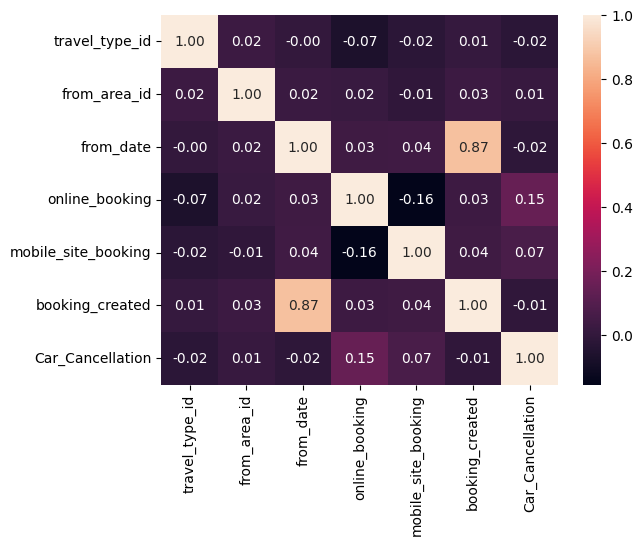

In [78]:
sns.heatmap(encoded_df2.corr(),annot=True,fmt='.2f')

In [79]:
x=encoded_df2.drop('Car_Cancellation',axis=1)
y=encoded_df2['Car_Cancellation'].values

In [80]:
#x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.20,random_state=53)

In [81]:
model_dt_2=DecisionTreeClassifier(random_state=1,max_depth=2)
model_dt_2.fit(x_train,y_train)
model_dt_2_score_train=model_dt_2.score(x_train,y_train)
model_dt_2_score_test=model_dt_2.score(x_test,y_test)
print('Training Score',model_dt_2_score_train)
print('Testing Score',model_dt_2_score_test)

Training Score 0.927958784250518
Testing Score 0.9275929549902152


In [82]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')
model_dt_2.fit(x_train,y_train)

model_dt_2_score_train = model_dt_2.score(x_train,y_train)

model_dt_2_score_test = model_dt_2.score(x_test,y_test)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

Training Score 0.927958784250518
Testing Score 0.9275929549902152


In [83]:
model_dt = DecisionTreeClassifier(max_depth=4,criterion='entropy')

model_dt.fit(x_train,y_train)

model_dt_score_train = model_dt.score(x_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(x_test,y_test)
print(model_dt_score_test)

0.9279875661984803
0.9272476113733165


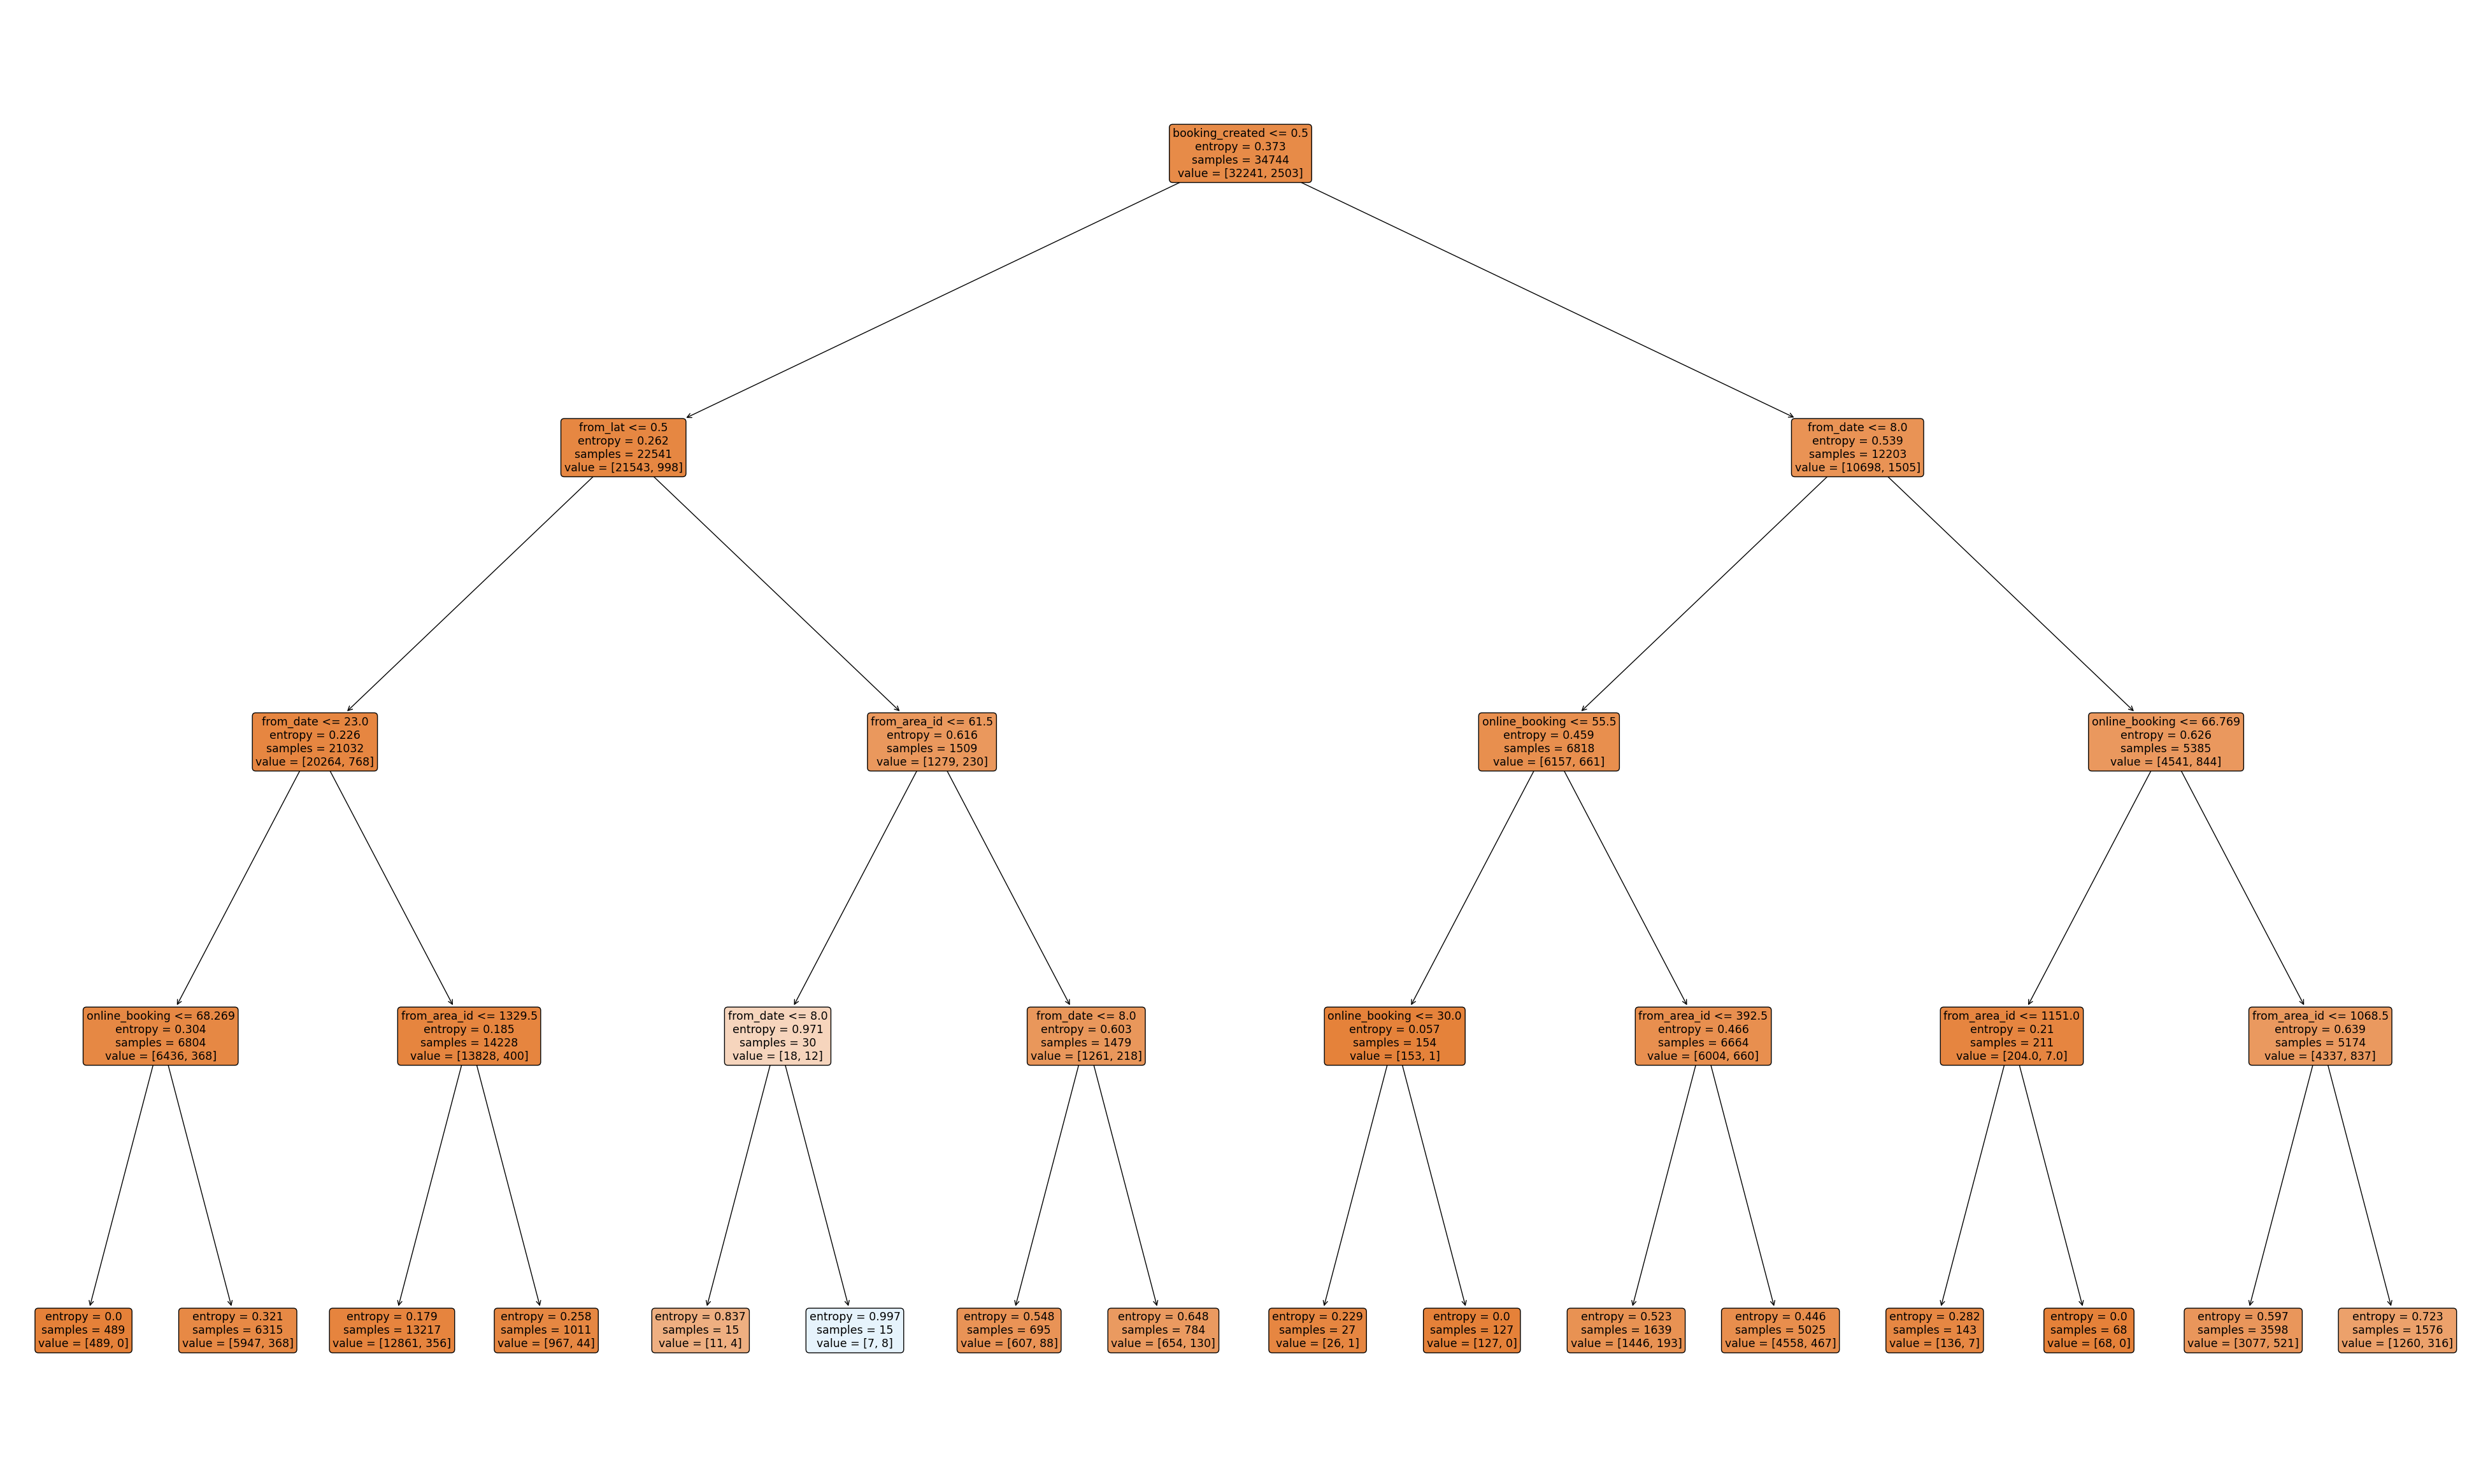

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,30)) 
plot_tree(model_dt, feature_names=data1.columns,filled=True, rounded=True)
plt.show()

In [85]:
y_pred_dt = model_dt.predict_proba(x_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

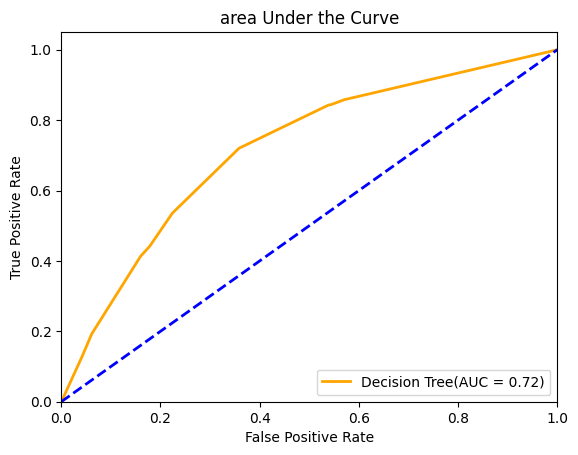

In [86]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [87]:
predictions = model_dt.predict(x_test)
print(confusion_matrix(y_test,predictions))

[[8055    3]
 [ 629    0]]


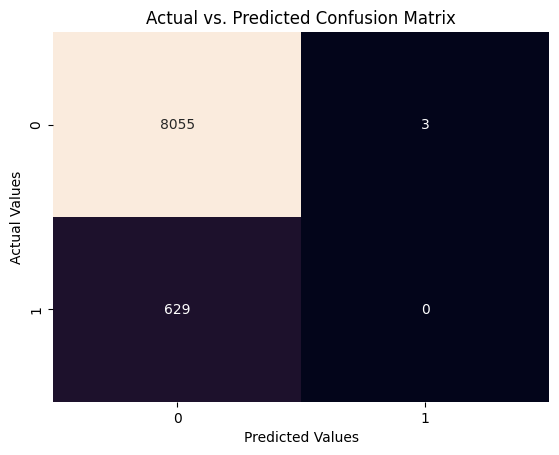

In [88]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [89]:
accuracy_score(y_test,predictions)

0.9272476113733165